In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def makeX(df):
    return df.iloc[0:df.shape[0], 1:t_data.shape[1]].values
def makeY(df):
    return df.iloc[0:df.shape[0],1].values

In [3]:
def bar(X):
    X = np.transpose(X)
    a = [np.full(X.shape[1],1)]
    X = np.append(X,a,0)
    return X

In [50]:
def ridgeReg(X,Y,lam):
    erra = []
    add = 0
    C = (np.dot(X,X.T) + (lam*np.identity(X.shape[0])))
    Cinv = np.linalg.inv(C)
    D = np.dot(X,Y)
    W = np.dot(Cinv, D) #
    for i in (0,X.shape[1]-1):
        xi = X.T[i]
        yi = Y[i]
        err = ((np.dot(xi.T,W) - yi) / (1 - (np.dot(np.dot(xi.T,Cinv),xi))))
        erra.append(err)
    for err in erra:
        add = add+(err**2)
    rmse = np.sqrt(add)
    obj = 0
    return W[0:W.shape[0]-2],W[W.shape[0]-1],rmse,obj
    

In [4]:
def ridge(X,Y,lam):
    C = (np.dot(X,X.T) + (lam*np.identity(X.shape[0])))
    Cinv = np.linalg.inv(C)
    D = np.dot(X,Y)
    W = np.dot(Cinv, D)
    return W                              #, W[W.shape[0]-1]

In [5]:
def Loocv(X,Y,lam):
    erra = []
    add = 0
    C = (np.dot(X,X.T) + (lam*np.identity(X.shape[0])))
    Cinv = np.linalg.inv(C)
    W = ridge(X,Y,lam)
    for i in (0,X.shape[1]-1):
        xi = X.T[i]
        yi = Y[i]
        err = ((np.dot(xi.T,W) - yi) / (1 - (np.dot(np.dot(xi.T,Cinv),xi))))
        erra.append(err)
    for err in erra:
        add = add+(err**2)
    rmse = np.sqrt(add)
    return rmse

In [6]:
def predict(X,W):
    pred = np.dot(X.T,W)
    return pred

In [7]:

def rmse(vl, pred):
    add = 0
    err = vl-pred
    for val in err:
        add = add + (val ** 2)
    rmse = np.sqrt((add/5000))
    return rmse

    


In [8]:
t_data = pd.read_csv("trainData.csv", header = None) 
tl_data = pd.read_csv("trainLabels.csv", header = None)

In [11]:
v_data = pd.read_csv("valData.csv",header = None)
vl_data = pd.read_csv("valLabels.csv",header = None)

In [12]:
Xtr = makeX(t_data)
Ytr = makeY(tl_data)

In [13]:
Valx = makeX(v_data)
Valy = makeY(vl_data)

In [14]:
ValX = Valx[:]
ValY = Valy[:]    #watchout for small x and y

In [15]:
ValX = bar(ValX)

In [14]:
Xtre = Valx[0:4000]
Ytre = Valy[0:4000]

In [16]:
ValX.shape

(3001, 5000)

In [17]:
X = Xtr
Y = Ytr

In [18]:
X.shape

(5000, 3000)

In [19]:
X = bar(X)
X.shape

(3001, 5000)

In [21]:
lam = [0.01,0.1,1,10,100,1000]

In [71]:
X.shape

(3001, 5000)

In [22]:
w = []
for l in lam:
    w.append(ridge(X,Y,l))
len(w)

6

In [169]:
w[0].shape

(3001,)

In [23]:
preds = [] 
for W in w:
    preds.append(predict(ValX,W))
len(preds)   

6

In [27]:
errors = []
for pred in preds:
    errors.append(rmse(ValY,pred))

In [29]:
val_error = errors

In [30]:
preds = [] 
for W in w:
    preds.append(predict(X,W))
len(preds)  

6

In [31]:
errors = []
for pred in preds:
    errors.append(rmse(Y,pred))

In [32]:
train_error = errors

In [33]:
train_error

[1.1204952813069096,
 1.222956840332517,
 1.5685871891911598,
 2.168437453524687,
 3.4814321724863753,
 14.30563531307903]

In [34]:
rmsel = []
for l in lam:
    rmsel.append(Loocv(X,Y,l))

In [37]:
loocv_error = rmsel 

In [39]:
lam

[0.01, 0.1, 1, 10, 100, 1000]

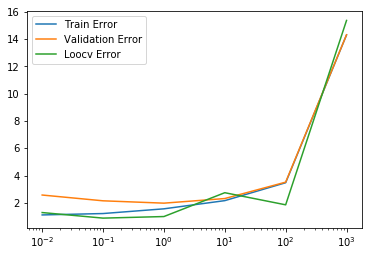

In [43]:
plt.semilogx(lam,train_error,label = "Train Error")
plt.semilogx(lam,val_error,label = "Validation Error")
plt.semilogx(lam,loocv_error,label = "Loocv Error")
plt.savefig("error_plot")
plt.legend()


In [ ]:
b = preds[0]
b.mean()

In [ ]:
err = ValY - b

In [ ]:
ValY

In [ ]:
X.shape

In [ ]:
Z = X.T
A = Z[0]
A.shape

In [196]:
Z = [10.25,14.36,18,71]

In [69]:
r = W.argsort()
r[2999]

184

In [70]:
W[184]

7.056741726442397

In [44]:
W = w[2]

In [47]:
train_error[2]

1.5685871891911598

In [45]:
obj = np.dot(W.T,W) + train_error[2]

In [46]:
obj

11916.91634962708

In [ ]:
C = (np.dot(X,X.T) + (1*np.identity(X.shape[0])))
Cinv = np.linalg.inv(C)

In [ ]:
Cinv.shape

In [19]:
X.shape

(3001, 10000)

In [19]:
rmsel = []
for l in lam:
    rmsel.append(Loocv(X,Y,l))
    
    

In [20]:
rmsel

[1.5139027012585224,
 1.6095969764785583,
 1.6588612644099834,
 1.693596275240875,
 1.7220568202790607,
 1.7472704202778084,
 1.770528447643568,
 1.7924276369455605,
 1.8132584624093213,
 1.8331691254978606]

In [23]:
W = w[4]

In [191]:
ValY[0:200]

array([85, 91, 93, 88, 86, 85, 84, 85, 94, 89, 89, 90, 85, 90, 89, 92, 89,
       89, 82, 91, 86, 93, 81, 83, 82, 91, 97, 85, 87, 88, 92, 84, 90, 82,
       86, 89, 93, 89, 86, 90, 82, 89, 85, 93, 90, 94, 88, 87, 88, 91, 90,
       88, 90, 85, 95, 89, 87, 90, 87, 88, 93, 84, 82, 87, 89, 83, 89, 90,
       97, 86, 91, 84, 86, 90, 84, 87, 88, 92, 83, 88, 87, 87, 92, 87, 89,
       85, 84, 87, 94, 82, 92, 91, 90, 87, 90, 86, 90, 85, 85, 93, 87, 92,
       92, 87, 90, 85, 94, 90, 87, 90, 90, 84, 88, 87, 92, 90, 91, 93, 88,
       88, 86, 93, 88, 87, 85, 83, 85, 91, 87, 88, 93, 90, 86, 90, 87, 92,
       85, 90, 90, 91, 86, 91, 95, 92, 85, 87, 89, 92, 94, 93, 87, 90, 92,
       85, 87, 86, 92, 88, 93, 82, 91, 88, 83, 87, 88, 88, 91, 86, 91, 92,
       85, 88, 88, 89, 92, 87, 95, 85, 82, 84, 89, 85, 92, 82, 91, 88, 87,
       85, 92, 91, 91, 87, 89, 91, 83, 99, 91, 83, 92, 84])

In [25]:
errors = []
for pred in preds:
    errors.append(rmse(ValY,pred))
    

In [51]:
a,z,e,q = ridgeReg(X,Y,1)

In [56]:
q

0

In [ ]:
print("Hii mihir is no {}".format(1))

In [200]:
d = rmse(ValY,np.floor(pred))
d

0.8752142594816426

In [26]:
for i in range(0,len(errors)):
    print("lambda: {} error: {}".format(lam[i],errors[i]))

lambda: 0.01 error: 2.579044903824746
lambda: 0.1 error: 2.1557423907528617
lambda: 1 error: 1.9835860902507114
lambda: 10 error: 2.322044052126761
lambda: 100 error: 3.522936918785193
lambda: 1000 error: 14.318915675050853


In [ ]:
Vv = V[4000:5000] 

In [ ]:
W = ridge(X,Y,0.7)

In [ ]:
W1 = w[6]

In [ ]:
s = predict(ValX,W)

In [ ]:
error = rmse(ValY,s)

In [ ]:
error

In [ ]:
Vyx = Vy[0:4000]

In [ ]:
Vyv = Vy[4000: 5000]

In [ ]:
V.shape

In [ ]:
XN = np.append(X,Vx,axis = 0)

In [ ]:
YN = np.append(Y,Vyx,0)

In [ ]:
YN.shape

In [ ]:
XN = bar(XN)

In [ ]:
w = ridge(XN,YN,1)

In [ ]:
pred = predict(Vv,w)

In [ ]:
rmse1s = rmse(Vyv,pred)

In [ ]:
rmse1s

In [ ]:
X = makeX(t_data)
Y = makeY(tl_data)

In [ ]:
X = bar(X)
X.shape

In [147]:
test0 = pd.read_csv("testData.csv",header= None)

In [148]:
test0 = makeX(test0)

In [149]:
test0 = bar(test0)

In [150]:
pred = predict(test0,W)

In [151]:
id4 = np.arange(0,5000)
id1.shape

(5000,)

In [152]:
df3 = pd.DataFrame()
df3['Id'] = id4
df3['Prediction'] = pred

In [154]:
df3.to_csv("predTestLabels.csv")

In [146]:
W = w[7]

In [133]:
W[:120]

array([ 8.77775011e-02,  3.68405235e+00,  1.86203563e+00, -5.79726007e-01,
       -3.47845275e-01,  1.50549823e+00, -1.02366244e+00,  1.69110684e+00,
       -3.88761592e-01, -1.16932961e+00, -5.00089189e-01, -1.29721406e+00,
        1.24268708e+00, -2.95110020e-01, -1.80591194e-01,  8.74306891e-01,
        1.83318731e+00,  3.60111485e-01, -1.15018087e+00,  2.34430739e+00,
        5.07527436e-01,  1.03585764e+00, -1.27008123e+00,  1.02267246e+00,
        9.53660704e-01, -3.36805686e-01, -1.06227656e+00, -1.06878263e+00,
       -3.69437791e-01, -7.40582470e-01,  9.70862184e-01, -3.51243179e-01,
        2.49026783e-01,  6.72662837e-02,  1.41256981e+00,  1.06757891e+00,
        2.13833686e+00,  1.95929484e+00,  1.94142915e-01, -4.72209133e-01,
       -8.27514944e-01, -2.70877542e+00, -3.91134475e-01,  2.70060643e+00,
       -1.14058223e+00,  1.84932146e+00,  2.26570865e+00,  3.17558648e+00,
       -8.95476444e-01,  3.87949939e-01,  2.18476069e+00,  6.38268719e-01,
        1.82522917e+00,  

In [134]:
id2=[]
num=[]
for i in range(0,W.shape[0]):
    if(W[i] > 2 or W[i]< -2):
        id2.append(i)
        num.append(W[i])
    


In [135]:
len(id2)

532

In [136]:
X_bar = []
for i in id2:
    X_bar.append(ValX[i])
    
    
    

In [137]:
len(X)

3001

In [138]:
X_bar = np.asarray(X_bar)

In [139]:
X_bar.shape

(532, 1000)

In [144]:
pred_bar = predict(X_bar,Wn)

In [145]:
errr = rmse(ValY,pred_bar)
errr

1.4009170195274032

In [141]:
Wn = np.asarray(num)

In [143]:
Wn[531]

82.58674233266083